***
# Project: Problem Statement - Personal Loan Campaign Modelling
# Thera Bank Personal Loan Campaign

***
## Data Description:
    
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

***
## Domain:
    
Banking

***
## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

***
## Attribute Information:

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (\$000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (\$000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (\$000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

***
## Learning Outcomes:

- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

***
## Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

***
## Steps and tasks:

1. <a href = #link1>Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)</a>

2. <a href = #link2>EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)</a>
        - Number of unique in each column?
        - Number of people with zero mortgage?
        - Number of people with zero credit card spending per month?
        - Value counts of all categorical columns.
        - Univariate and Bivariate
        - Get data model ready
        
3. <a href = #link3>Split the data into training and test set in the ratio of 70:30 respectively (5 marks)</a>

4. <a href = #link4>Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)</a>

5. <a href = #link5>Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)</a>

6. <a href = #link6>Give conclusion related to the Business understanding of your model? (5 marks)</a>

***
## <a id='link1'>1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation</a>

### Install Packages and Import libraries

In [ ]:
pip install --upgrade numpy

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade matplotlib

In [ ]:
pip install --upgrade seaborn

In [ ]:
pip install --upgrade sklearn

In [6]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [7]:
# Adjust Pandas display and formatting settings
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.3f}'.format

In [8]:
# Adjust Pandas to show more rows of data (100) without any hiding
pd.set_option('display.max_rows', 100)

### Load and Explore the Data

In [9]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


### Check Data Types

In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) "CCAvg" is a "float64" variable
    
2) All other variables are "int64" or 64 bit integers

### Statistical Summary

In [11]:
bank_data.describe(include = "all")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000"
mean,"2,500.500",45.338,20.105,73.774,"93,152.503",2.396,1.938,1.881,56.499,0.096,0.104,0.060,0.597,0.294
std,"1,443.520",11.463,11.468,46.034,"2,121.852",1.148,1.748,0.840,101.714,0.295,0.306,0.238,0.491,0.456
min,1.000,23.000,-3.000,8.000,"9,307.000",1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,"1,250.750",35.000,10.000,39.000,"91,911.000",1.000,0.700,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,"2,500.500",45.000,20.000,64.000,"93,437.000",2.000,1.500,2.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,"3,750.250",55.000,30.000,98.000,"94,608.000",3.000,2.500,3.000,101.000,0.000,0.000,0.000,1.000,1.000
max,"5,000.000",67.000,43.000,224.000,"96,651.000",4.000,10.000,3.000,635.000,1.000,1.000,1.000,1.000,1.000


In [12]:
bank_data.skew()

ID                     0.000
Age                   -0.029
Experience            -0.026
Income                 0.841
ZIP Code             -12.500
Family                 0.155
CCAvg                  1.598
Education              0.227
Mortgage               2.104
Personal Loan          2.744
Securities Account     2.588
CD Account             3.692
Online                -0.395
CreditCard             0.905
dtype: float64

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) "Age" range from 23 to 67 years, with mean and median at 45.34 and 45, respectively. This suggests it's very close to a symmetrical distribution
    
2) "Experience" (years of professional experience) minimum value of -3, suggesting negatives values should be further investigated and cleaned up
    
3) "Income" (annual income of the customer \\$000) range from \\$8,000 to \\$224,000. Mean (\\$73,774) and median (\\$64,000), having some moderate skewness to the right (skewness = 0.841)

4) On "ZIP Code" the "minimum" value has 04 digits only, suggesting a further investigation and clean up

5) "CCAvg" (average spending on credit cards per month \\$000) ranges from \\$0 to \\$10,000, with mean of \\$1,938 and highly positive skew (skewness = 1.598)

6) "Mortgage" (value of house mortgage if any \\$000) with mean of \\$56,499, standard deviation of \\$101,714 and median of \\$0, suggesting a strong right skewness (skewness = 2.104)

### Shape

In [13]:
bank_data.shape

(5000, 14)

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) There are 5000 rows and 14 columns in the dataset

### Null Values

In [14]:
bank_data.isnull().values.any()

False

In [15]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) There aren't any missing values in the dataset

### Check Incorrect Imputations

In [16]:
# As already pointed out before, "Experience" and "ZIP Code" are having suspicious values

In [17]:
pd.crosstab(index = bank_data['Experience'], columns = "count").head()

col_0,count
Experience,
-3,4
-2,15
-1,33
0,66
1,74


In [18]:
print(len(bank_data[bank_data['Experience'] < 0]),"rows have Experience with incorrect entries (negative numbers)")

52 rows have Experience with incorrect entries (negative numbers)


In [19]:
pd.crosstab(index = bank_data['ZIP Code'], columns = "count").head()

col_0,count
ZIP Code,
9307,1
90005,5
90007,6
90009,8
90011,3


In [20]:
# Finding the row with incorrect "ZIP Code" entry
incorrect_zip = bank_data[(bank_data['ZIP Code'].astype('string').str.count('\d') < 5)]
incorrect_zip

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.600,3,0,0,0,0,1,1


In [21]:
print(len(incorrect_zip), "row has the ZIP Code with an incorrect entry (less than 05 digits)")

1 row has the ZIP Code with an incorrect entry (less than 05 digits)


**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) Regarding incorrect imputations, 52 rows of "Experience" have negative values and 1 data entry on "ZIP Code" has less than 05 digits
    
2) By now these incorrect imputations will be left in the dataset, however they will be addressed in the next steps

***
## <a id='link2'>2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
Number of unique in each column?\
Number of people with zero mortgage?\
Number of people with zero credit card spending per month?\
Value counts of all categorical columns\
Univariate and Bivariate\
Get data model ready</a>

### Number of Unique Values in each Column

In [22]:
bank_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Number of People with Zero Mortgage

In [23]:
print(bank_data[(bank_data == 0)].count()['Mortgage'],"people have zero Mortgage")

3462 people have zero Mortgage


In [24]:
bank_data['Mortgage'].value_counts(normalize = True)

0     0.692
98    0.003
89    0.003
91    0.003
83    0.003
       ... 
206   0.000
210   0.000
258   0.000
278   0.000
635   0.000
Name: Mortgage, Length: 347, dtype: float64

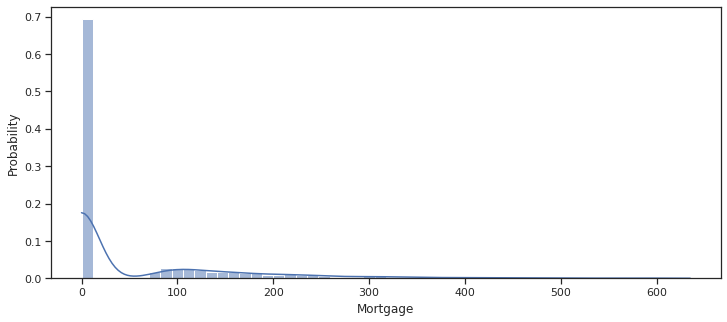

In [25]:
sns.set({'figure.figsize': (12, 5)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")
sns.histplot(data = bank_data["Mortgage"], stat='probability', kde = True);

### Number of People with Zero Credit Card Spending per Month

In [26]:
print(bank_data[(bank_data == 0)].count()['CCAvg'],"people have zero credit card spend per month")

106 people have zero credit card spend per month


### Value Counts of All Categorical Columns

In [27]:
# "Family" and "Education" are variables that only exist in the dataset with discrete levels, therefore it’s recommended to consider them as categorical (ordinal) variables.
# "Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard" are binary or boolean variables (with only two values) and will be also converted to categorical.

# Converting "ZIP Code", "Family", "Education", "Personal Loan", "Securities Account", "CD Account", "Online" and "CreditCard" to Categorical
bank_data[["Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"]] = bank_data[["Family", "Education", "Securities Account", "CD Account",\
                                                                                                            "Online", "CreditCard"]].astype('category')

In [28]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.7 KB


In [29]:
# Value Counts for All Categorical Variables
for column in bank_data.select_dtypes(include = ['category']):
    print(bank_data[column].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) The counts per category above suggests "Family" and "Education" are categorical variables with more than 02 discrete levels (non-binary)
    
2) "Personal Loan", "Securities Account", "CD Account", "Online" and "CreditCard" are binary or boolean variables
    
3) The other variables "Age", "Experience", "Income", "CCAvg" and "Mortgage" were not include in the summary above since they were considered continuous variables
    
4) "ZIP Code" was also not included in the summary above. It's a categorical variable with several several levels, and will be addressed in the next steps 

### Univariate and Bivariate

In [30]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


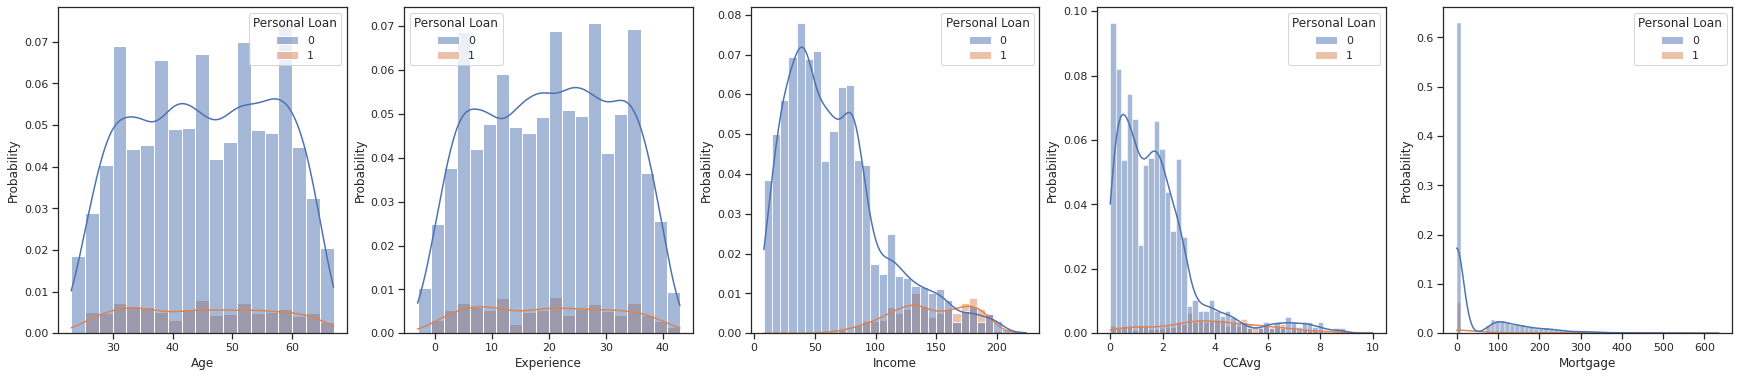

In [31]:
# Univariate Analysis - Histogram for the Continuous Variables ("Age", "Experience", "Income", "CCAvg" and "Mortgage")
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")

features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (30, 6))
axs = axs.flatten()

counter = 0
for i in features:
    sns.histplot(x = features[counter], kde = True, data = bank_data, hue = "Personal Loan", stat='probability', ax = axs[counter])
    counter = counter + 1

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) "Age" and "Experience" have more symmetric distributions
    
2) "Income", "CCAvg" and "Mortgage" distributions are skewed to the right
    
3) Customers with highers "Income" are more likley to have a loan with the bank
    
4) "Mortgage" has lots of zeros and that makes its skewness to be much more expressive

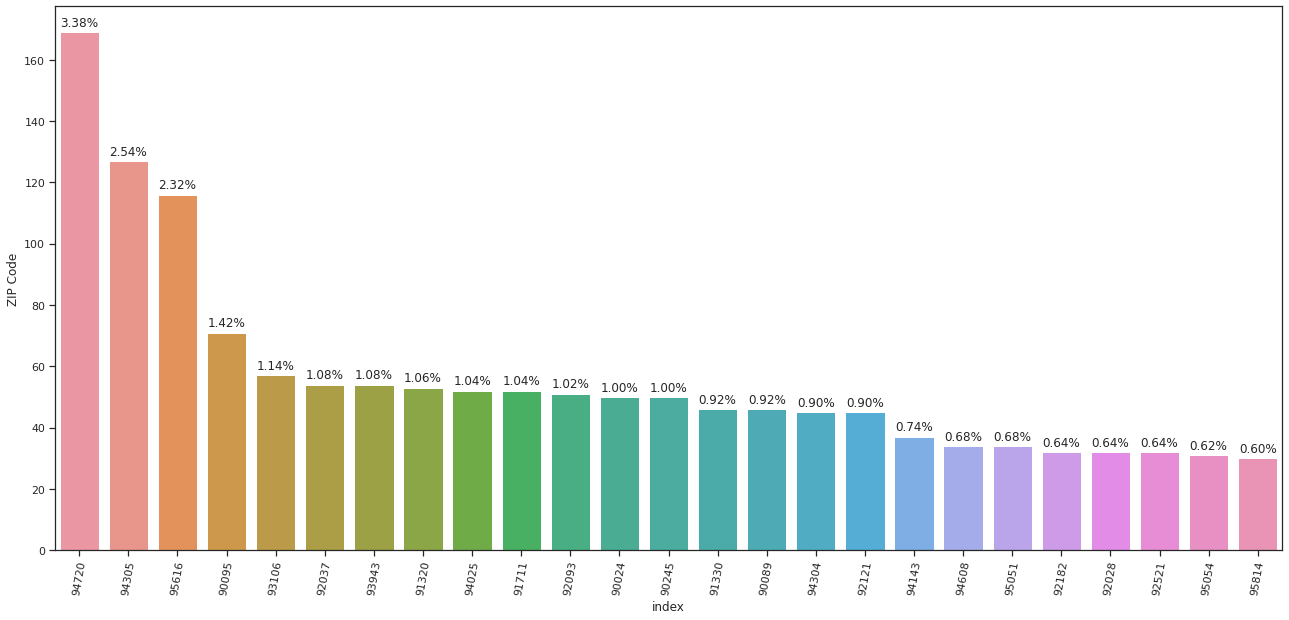

In [32]:
# Univariate Analysis - Barplot for "ZIP Code"
top50_zipcodes = bank_data['ZIP Code'].value_counts().reset_index().iloc[0:25, ]

sns.set({'figure.figsize': (22, 10)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")
total = float(len(bank_data))
ax = sns.barplot(x = "index", y = "ZIP Code", order = top50_zipcodes['index'], data = top50_zipcodes)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 2, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) "ZIP Code" has several levels but some of them such 94720, 94305 and 95616 have larger count than the others
    
2) "ZIP Code" was decided to not be included in the analysis because that would result into several dummy variables, and possibly creating more complexity (and less value) to the Classification model
    
3) If more information was available, ideally "ZIP Code" could be potentially broken into other demographic and continuous variables which are often far more useful than just going based on binarized codes

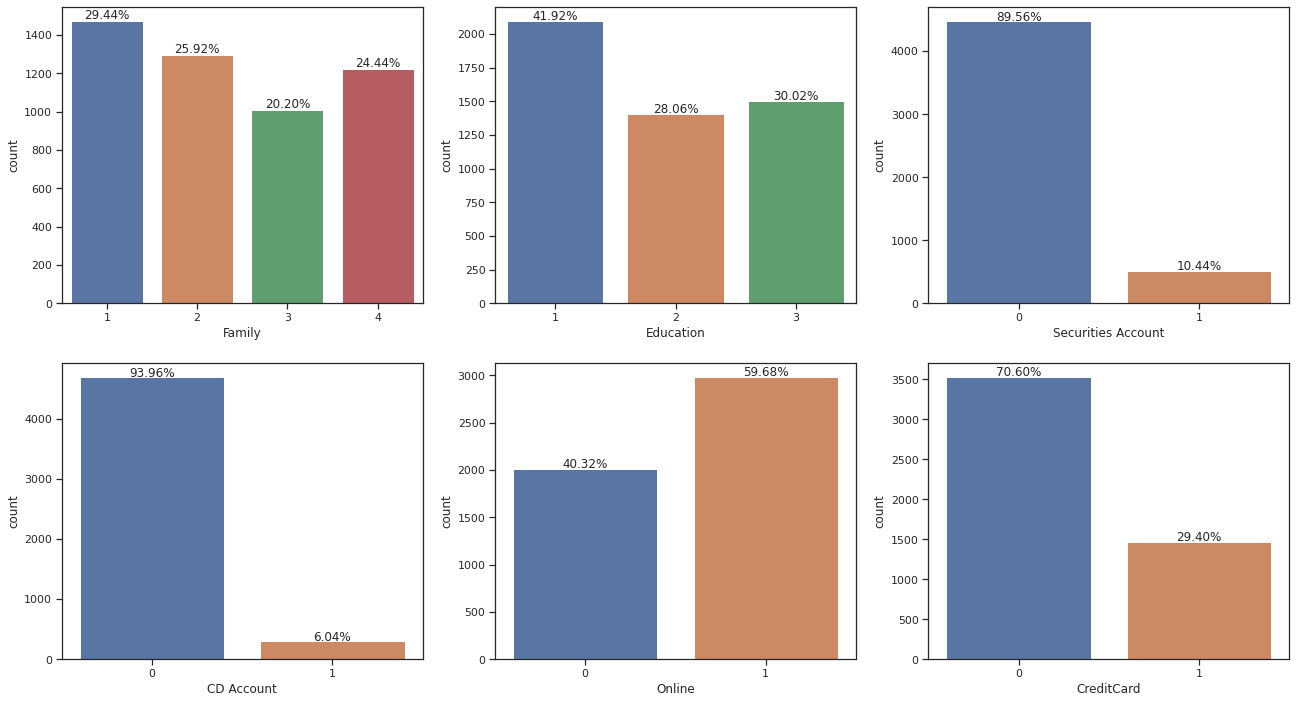

In [33]:
# Univariate Analysis - Countplot for "Family", "Education", "Securities Account", "CD Account", "Online" and "CreditCard"
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")

features = ['Family', 'Education', "Securities Account", "CD Account", "Online", "CreditCard"]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (22, 12))
axs = axs.flatten()

counter = 0
for i in features:
    total = float(len(bank_data)) 
    ax = sns.countplot(x = features[counter], data = bank_data, ax = axs[counter])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 10, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")
    counter = counter + 1

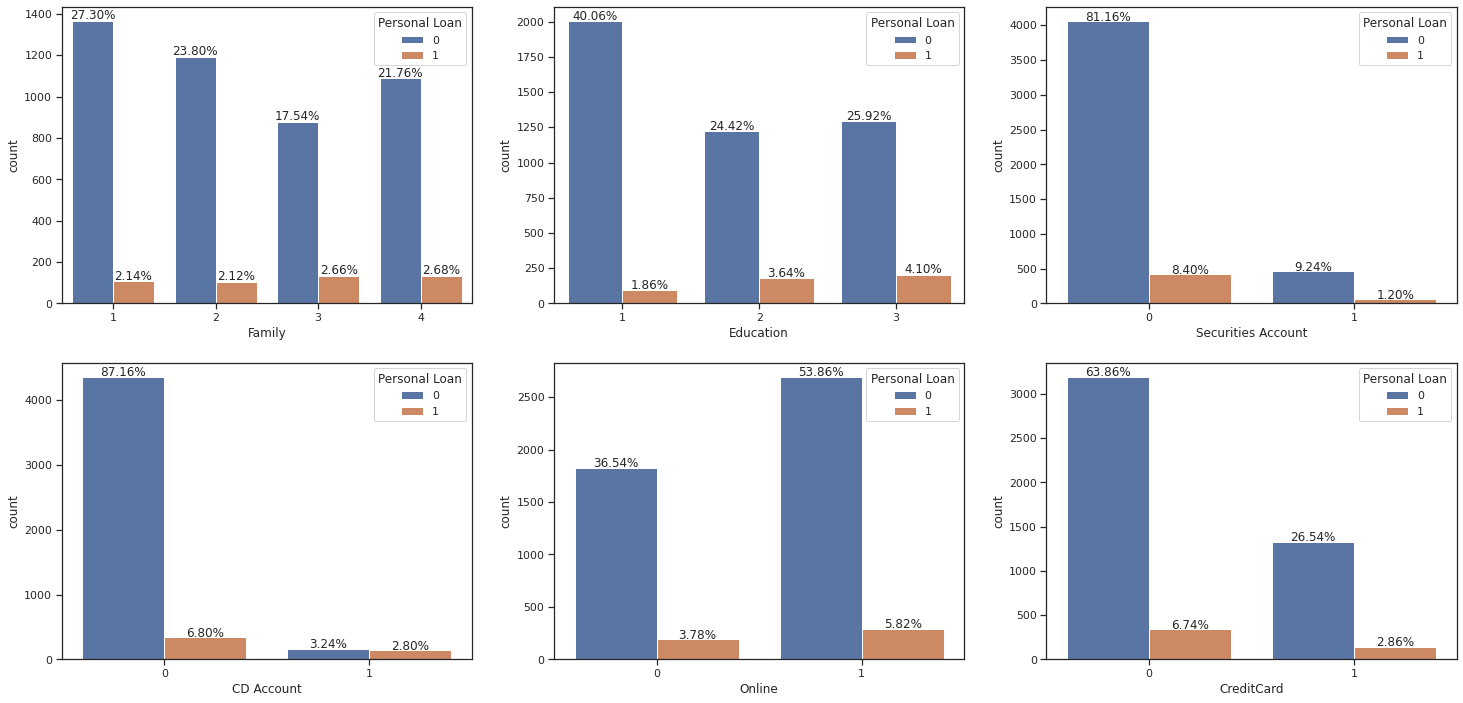

In [34]:
# Univariate Analysis - Countplot (with hue on "Personal Loan") for "Family", "Education", "Securities Account", "CD Account", "Online" and "CreditCard"
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")

features = ['Family', 'Education', "Securities Account", "CD Account", "Online", "CreditCard"]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (25, 12))
axs = axs.flatten()

counter = 0
for i in features:
    total = float(len(bank_data))
    ax = sns.countplot(x = features[counter], hue = "Personal Loan", data = bank_data, ax = axs[counter])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 10, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")
    counter = counter + 1

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) The levels "Family" are more evenly distributed. Around 29% of the Customer's family size is 01. Family sizes of 3 and 4 are slightly more likely to have a loan with the bank
    
2) On "Education" ~42% of the candidates are undergraduated, while ~28% are graduate and ~30% are advanced/professional. Graduate and advanced/professional Customers are more likely to have a loan with the bank
    
3) Only 10.44% of Customers have securities accounts with the bank
    
4) Only 6.04% of Customers have certificate of deposit accounts with the bank. Most of the Customers with certificate of deposit accounts have a loan with the bank
    
5) Most of the Customers (59.68%) use internet banking facilities
    
6) Most of the Customers (70.60%) don't use a credit card issued by the bank

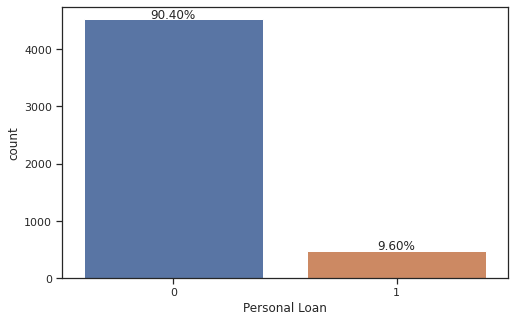

In [35]:
# Univariate Analysis - Countplot for "Personal Loan"
sns.set({'figure.figsize': (8, 5)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")
total = float(len(bank_data)) 
ax = sns.countplot(x = "Personal Loan", data = bank_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) "Personal Loan" is the dependent variable ("y" for the Classification model). As previouly stated in the Data Description, among 5000 Customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

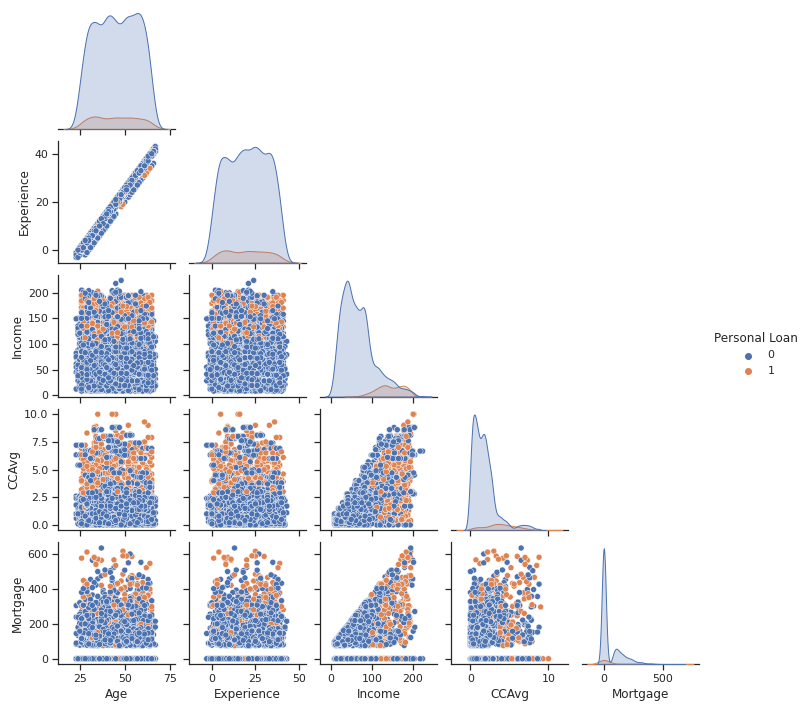

In [36]:
# Bivariate Analysis - Pairplot (with hue on "Personal Loan") for the Continuous Variables ("Age", "Experience", "Income", "CCAvg" and "Mortgage")
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("notebook")
sns.pairplot(data = bank_data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage','Personal Loan']], hue = "Personal Loan", height = 2, corner = True);

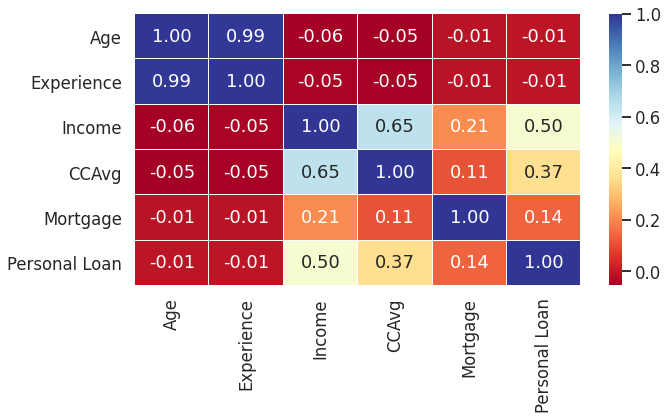

In [37]:
# Bivariate Analysis - Heatmap for the Continuous Variables ("Age", "Experience", "Income", "CCAvg" and "Mortgage"), including "Personal Loan"
sns.set({'figure.figsize': (10,5)})
sns.set_context("talk")
sns.heatmap(bank_data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']].corr(), annot = True, cmap = "RdYlBu", fmt = '.2f', linewidths = 0.05);

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) "Age" and "Experience" are highly correlated, therefore we don't need both of them in the Classification model. For a sake of simplification, "Experience" won't be included in the Classification model because it has some incorrect imputations, as mentioned before.
    
2) "Income" is the continuous variable with the highest correlation (0.50) with "Personal Loan", therefore it's expected to see this variable being one of the largest contributors (coefficient) in the Classification model.

### Get Data Model Ready

In [38]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.7 KB


In [39]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


In [40]:
# Deleting the "ID" entire column
bank_data.drop(columns = 'ID', inplace = True)
bank_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


In [41]:
# Deleting the "Experience" entire column
bank_data.drop(columns = 'Experience', inplace = True)
bank_data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.600,1,0,0,1,0,0,0
1,45,34,90089,3,1.500,1,0,0,1,0,0,0
2,39,11,94720,1,1.000,1,0,0,0,0,0,0
3,35,100,94112,1,2.700,2,0,0,0,0,0,0
4,35,45,91330,4,1.000,2,0,0,0,0,0,1


In [42]:
# Deleting the "ZIP Code" entire column
bank_data.drop(columns = 'ZIP Code', inplace = True)
bank_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.600,1,0,0,1,0,0,0
1,45,34,3,1.500,1,0,0,1,0,0,0
2,39,11,1,1.000,1,0,0,0,0,0,0
3,35,100,1,2.700,2,0,0,0,0,0,0
4,35,45,4,1.000,2,0,0,0,0,0,1


In [43]:
# "Family" and "Education" will be converted into their respective dummy variables (one-hot encoding).
bank_data = pd.get_dummies(bank_data, columns = ['Family', 'Education'], drop_first = True)
bank_data.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,49,1.600,0,0,1,0,0,0,0,0,1,0,0
1,45,34,1.500,0,0,1,0,0,0,0,1,0,0,0
2,39,11,1.000,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.700,0,0,0,0,0,0,0,0,0,1,0
4,35,45,1.000,0,0,0,0,0,1,0,0,1,1,0


In [44]:
# Using MinMaxScaler Transform to normalize the dataset. Normalization scales each selected input variable separately to the range 0-1. 
# It's recommended to normalize the continuous variables because their scales are different from each other, and also different from the other independent variables.
# Normalization was decided to be a better scaler than Standardization because most of the continuous variables have a relevant degree of skewness in their distributions.

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

logreg_data = bank_data
logreg_data[['Age', 'Income', 'CCAvg', 'Mortgage']] = minmax_scaler.fit_transform(logreg_data[['Age', 'Income', 'CCAvg', 'Mortgage']])

logreg_data.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.045,0.190,0.160,0.000,0,1,0,0,0,0,0,1,0,0
1,0.500,0.120,0.150,0.000,0,1,0,0,0,0,1,0,0,0
2,0.364,0.014,0.100,0.000,0,0,0,0,0,0,0,0,0,0
3,0.273,0.426,0.270,0.000,0,0,0,0,0,0,0,0,1,0
4,0.273,0.171,0.100,0.000,0,0,0,0,1,0,0,1,1,0


**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) Now the data is clean and ready to be used to build a Logistic Regression model:
    
&emsp; Independent Variables (continuous): "Age", "Income", "CCAvg", "Mortgage"
    
&emsp; Independent Variables (categorical / boolean): "Securities Account", "CD Account", "Online", CreditCard"
    
&emsp; Independent Variables (categorical / discrete / hot-encoded): "Family", "Education"
    
&emsp; Dependent Variable (categorical / boolean): "Personal Loan"

2) Normalization was used to scale the continuous variables in the dataset without affecting the originally boolean and hot-encoded variables. Without normalizing the data, large input values may result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error. Also, normalizing the data will guarantee an accurate comparison (non-biased estimates) for the regression model coefficients (variables importance).

***
## <a id='link3'>3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)</a>

### Splitting the Data: Training (70%) and Test (30%)

In [45]:
X = logreg_data.drop(columns = ['Personal Loan'])
y = logreg_data['Personal Loan'].astype('category')

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [47]:
# Split X and y into Training and Test Set in 70:30 Ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

In [48]:
# Resulting Split into Training and Test Set (70:30 Ratio)
print("Original Personal Loan True Values  : {0} ({1:0.2f}%)".format(len(logreg_data.loc[logreg_data['Personal Loan'] == 1]),\
                                                                     (len(logreg_data.loc[logreg_data['Personal Loan'] == 1])/len(logreg_data.index)) * 100))
print("Original Personal Loan False Values : {0} ({1:0.2f}%)".format(len(logreg_data.loc[logreg_data['Personal Loan'] == 0]),\
                                                                     (len(logreg_data.loc[logreg_data['Personal Loan'] == 0])/len(logreg_data.index)) * 100))
print("")
print("Training Personal Loan True Values  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original Personal Loan True Values  : 480 (9.60%)
Original Personal Loan False Values : 4520 (90.40%)

Training Personal Loan True Values  : 336 (9.60%)
Training Personal Loan False Values : 3164 (90.40%)

Test Personal Loan True Values      : 144 (9.60%)
Test Personal Loan False Values     : 1356 (90.40%)


***
## <a id='link4'>4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)</a>

### Use the Logistic Regression model to predict whether the customer will take a personal loan or not

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
# Fit the model on train
logreg = LogisticRegression(solver = "liblinear", random_state = 42)
logreg.fit(X_train, y_train)

# I tried to use class_weights as well - see observation below
# logreg = LogisticRegression(solver = "liblinear", random_state = 42, class_weight = {0:.1, 1:.9})

LogisticRegression(random_state=42, solver='liblinear')

In [51]:
# Predict on test
y_pred = logreg.predict(X_test)

**Observations:**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
1) I ran some tests as an attempt to compensate for dependent variable data imbalance by adjusting the Logistic Regression weights. By adding a class_weight ratio in the Classification model I could create a change in Recall and Precision based on the choice of the weights. However, in my opinion, the "class_weight" hyperparameter will make the ROC Curve less meaningful in the sense it'd be no longer possible to use it to set a target Recall to pick the right threshold. My understand is that either a technique to balance the data (SMOTE, class_weights, etc) OR the choice a new threshold will result into the same benefit to the model, which is maximizing the Recall (reduce the number of false negatives).

### Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [52]:
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

In [53]:
print("Training Accuracy", round(logreg.score(X_train, y_train), 3))
print("Testing Accuracy", round(accuracy_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC AUC Score:", round(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]), 3))

Training Accuracy 0.956
Testing Accuracy 0.957
Recall: 0.611
Precision: 0.907
F1 Score: 0.73
ROC AUC Score: 0.967


In [54]:
# Classification Model Performance 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.91      0.61      0.73       144

    accuracy                           0.96      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.96      0.96      0.95      1500



### Draw a Heatmap to Display the Confusion Matrix

In [55]:
# Function to get a Confusion Matrix in a proper format
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels = [0, 1])
    plt.figure(figsize = (7,5))
    sns.set_context("talk")
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

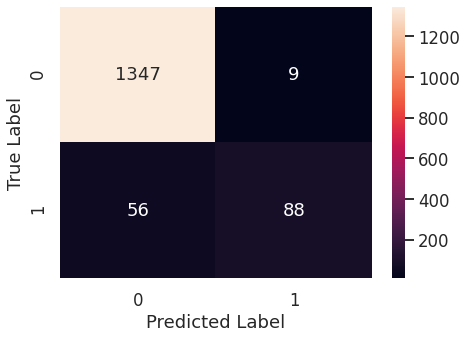

In [56]:
draw_cm(y_test, y_pred)

***
## <a id='link5'>5. Find out coefficients of all the attributes and show the output in a data frame with column names. For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)</a>

### Coefficients of all the attributes and show the output in a data frame with column names

In [57]:
# Coefficients 
coef = pd.DataFrame()
coef['Col'] = X_train.columns
coef['Coeff'] = np.round(logreg.coef_[0], 2)
print(coef)

                   Col  Coeff
0                  Age -0.340
1               Income  8.090
2                CCAvg  1.860
3             Mortgage  0.670
4   Securities Account -0.740
5           CD Account  2.980
6               Online -0.610
7           CreditCard -0.890
8             Family_2 -0.300
9             Family_3  1.130
10            Family_4  0.920
11         Education_2  2.330
12         Education_3  2.400


### For test data show all the rows where the predicted class is not equal to the observed class

In [58]:
z = pd.DataFrame()
z['Actual'] = y_test
z['Predicted Output Probability'] = logreg.predict_proba(X_test)[:, 1]
z['Predicted'] = logreg.predict(X_test)
z.head()

,Actual,Predicted Output Probability,Predicted
4433,0,0.008,0
274,0,0.004,0
2439,0,0.014,0
1519,0,0.012,0
943,0,0.186,0


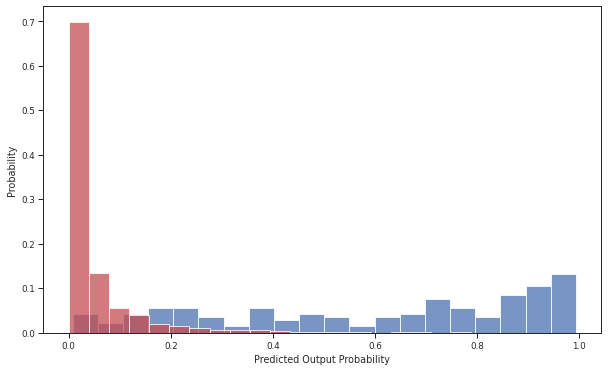

In [59]:
sns.set({'figure.figsize': (10,6)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper")
sns.histplot(z[z['Actual'] == 1]["Predicted Output Probability"], stat = "probability", bins = 20, color = 'b')
sns.histplot(z[z['Actual'] == 0]["Predicted Output Probability"], stat = "probability", bins = 20, color = 'r');

In [60]:
# All rows where the predicted class is not equal to the observed class
z[(z['Actual'] != z['Predicted'])]

,Actual,Predicted Output Probability,Predicted
2268,1,0.125,0
3403,1,0.163,0
3517,1,0.109,0
3456,1,0.243,0
4225,0,0.552,1
965,1,0.296,0
4016,1,0.379,0
3766,1,0.360,0
2910,1,0.355,0
2158,1,0.011,0


***
## <a id='link6'>6. Give conclusion related to the Business understanding of your model? (5 marks)</a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
The Classification goal is to predict the likelihood of a liability customer buying personal loans. Because of that we must concentrate on reducing the type II error, since we are interested in the Customers who had actually bought personal loans, but our model predicted them to be a non-buyer. Reducing the amount of false negatives is similar to maximizing the Recall.

Initial Confusion Matrix


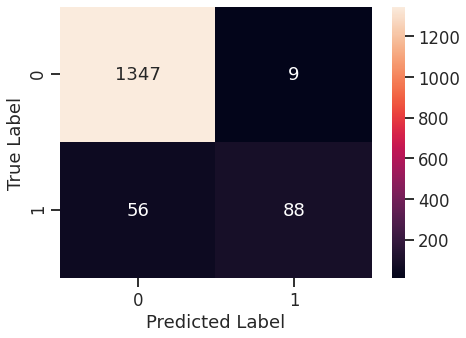

Testing Accuracy 0.957
Recall: 0.611
Precision: 0.907
F1 Score: 0.73
ROC AUC Score: 0.967


In [61]:
# Initial Confusion Matrix (Default Threshold of 0.5)

print('Initial Confusion Matrix')
draw_cm(z['Actual'], z['Predicted'])
print("Testing Accuracy", round(accuracy_score(z['Actual'], z['Predicted']), 3))
print("Recall:", round(recall_score(z['Actual'], z['Predicted']), 3))
print("Precision:", round(precision_score(z['Actual'], z['Predicted']), 3))
print("F1 Score:", round(f1_score(z['Actual'], z['Predicted']), 3))
print("ROC AUC Score:", round(roc_auc_score(z['Actual'], logreg.predict_proba(X_test)[:, 1]), 3))

In [62]:
# Classification Model Performance with the Default Threshold (0.5)
print(classification_report(z['Actual'], z['Predicted']))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.91      0.61      0.73       144

    accuracy                           0.96      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.96      0.96      0.95      1500



<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
The Recall for the current regression model is 0.611 (for a default threshold of 0.5) which is not satisfactory if we want to minimize the amount of false negatives (and/or maximize the amount of true positives) in the prediction model.
    
The Area Under the ROC Curve is 0.967 which represents the Classification model is doing a good job at distinguishing between the positive and negative classes. This conveys that that a good way to improve the Recall is by changing the threshold in the model.
    
In order to understand whether a better threshold can be used to improve the Recall, a ROC Curve will be utilized.

In [63]:
# AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

In [64]:
ROC_data = pd.DataFrame()
ROC_data['True Positive Rate (Recall or Sensitivity)'] = tpr
ROC_data['False Positive Rate (1 - Specificity)'] = fpr
ROC_data['Thresholds'] = thresholds
ROC_data.head()

,True Positive Rate (Recall or Sensitivity),False Positive Rate (1 - Specificity),Thresholds
0,0.000,0.000,1.993
1,0.007,0.000,0.993
2,0.361,0.000,0.791
3,0.361,0.001,0.788
4,0.479,0.001,0.711


In [65]:
# New Threshold calculation to Maximize the Recall
# Note that here's being assumed a target Recall of 0.9
target_recall = 0.9
target_recall_average = ROC_data[(round(ROC_data['True Positive Rate (Recall or Sensitivity)'], 2) == target_recall)].mean()
print("For a target Recall of approximate 0.9, the new Threshold should be around", round(target_recall_average.iloc[2], 2))

For a target Recall of approximate 0.9, the new Threshold should be around 0.15


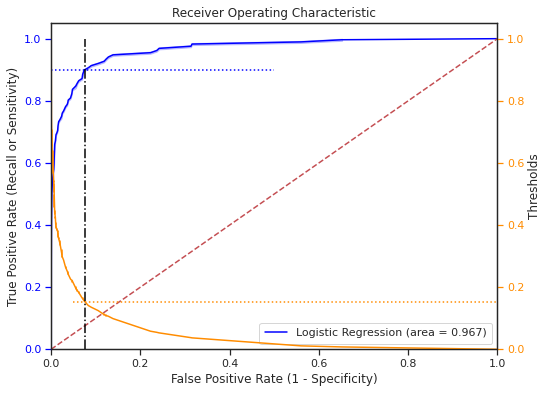

In [66]:
# AUC ROC curve
sns.set({'figure.figsize': (8, 6)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")
sns.lineplot(x = "False Positive Rate (1 - Specificity)", y = "True Positive Rate (Recall or Sensitivity)", color = "blue", data = ROC_data,\
             label = 'Logistic Regression (area = {0:.3f})'.format(logit_roc_auc))
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right', borderpad = 0.5)
plt.tick_params(axis='y', colors='blue')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
ax2 = plt.twinx()
sns.lineplot(x = "False Positive Rate (1 - Specificity)", y = "Thresholds", color = "darkorange", err_style = "bars", data = ROC_data, ax = ax2)

# Maximize Recall --> Assumed 0.9 as the target for Recall
plt.axhline(target_recall_average['True Positive Rate (Recall or Sensitivity)'], xmin = 0, xmax = 0.5, ls=':', color = 'blue')
plt.axvline(target_recall_average['False Positive Rate (1 - Specificity)'], ymin = 0, ymax = 0.95, ls='-.', color = 'black')
plt.axhline(target_recall_average['Thresholds'], xmin = 0.05, xmax = 1, ls=':', color = 'darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tick_params(axis='y', colors = 'darkorange');

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
A target of 0.9 for the Recall was assumed here (horizontal dotted blue line).
    
The vertical black dash-dotted line was used to bring the reference of the target Recall from the ROC Curve (solid blue) to the Threshold curve (solid orange).
    
A Threshold of 0.15 was calculated based on the intercept of the black dash-dotted line to the Threshold curve (solid orange). The dotted orange line represents the new Threshold value.
    
This new threshold will be utilized to improve the Recall on the Classification model.

In [67]:
# Changing the Threshold
new_threshold = 0.15
z['Predicted New Threshold'] = z['Predicted Output Probability'].map(lambda x: 1 if x > new_threshold else 0)
z.head()

,Actual,Predicted Output Probability,Predicted,Predicted New Threshold
4433,0,0.008,0,0
274,0,0.004,0,0
2439,0,0.014,0,0
1519,0,0.012,0,0
943,0,0.186,0,1


Final Confusion Matrix


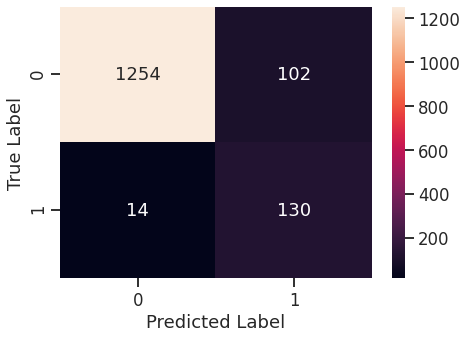

Testing Accuracy 0.923
Recall: 0.903
Precision: 0.56
F1 Score: 0.691
ROC AUC Score: 0.967


In [68]:
# Final Confusion Matrix (New Threshold of 0.15)

print('Final Confusion Matrix')
draw_cm(z['Actual'], z['Predicted New Threshold'])
print("Testing Accuracy", round(accuracy_score(z['Actual'], z['Predicted New Threshold']), 3))
print("Recall:", round(recall_score(z['Actual'], z['Predicted New Threshold']), 3))
print("Precision:", round(precision_score(z['Actual'], z['Predicted New Threshold']), 3))
print("F1 Score:", round(f1_score(z['Actual'], z['Predicted New Threshold']), 3))
print("ROC AUC Score:", round(roc_auc_score(z['Actual'], logreg.predict_proba(X_test)[:, 1]), 3))

In [69]:
# Classification Model Performance with the new Threshold
print(classification_report(z['Actual'], z['Predicted New Threshold']))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1356
           1       0.56      0.90      0.69       144

    accuracy                           0.92      1500
   macro avg       0.77      0.91      0.82      1500
weighted avg       0.95      0.92      0.93      1500



<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
As predicted using the ROC Curve analysis above, with the new threshold of 0.15 the Recall increased from 0.61 to 0.90.
    
Based on the scope of this project, this represents a considerable benefit in terms of minimizing the amount of false negatives, and ensuring the Classification model is able to predict most of the Customers who had actually bought personal loans as being loan buyers.
    
The importance from each Feature in the model will be explored next.

In [70]:
## Feature Importance or Absolute Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = logreg.coef_[0]
fi['Abs Coeff'] = abs(logreg.coef_[0])
fi = fi.sort_values(by = 'Abs Coeff', ascending = False)
fi

,Col,Coeff,Abs Coeff
1,Income,8.093,8.093
5,CD Account,2.984,2.984
12,Education_3,2.401,2.401
11,Education_2,2.327,2.327
2,CCAvg,1.857,1.857
9,Family_3,1.133,1.133
10,Family_4,0.920,0.920
7,CreditCard,-0.886,0.886
4,Securities Account,-0.735,0.735
3,Mortgage,0.666,0.666


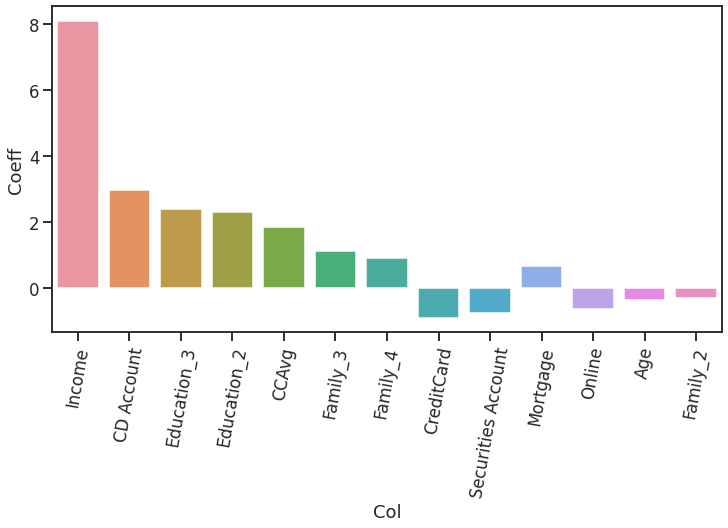

In [71]:
sns.set({'figure.figsize': (12, 6)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("talk")
g = sns.barplot(x = "Col", y = "Coeff", order = fi['Col'], data = fi)
g.set_xticklabels(g.get_xticklabels(), rotation = 80);

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
If the bank is willing to explore other options to atract more loan buyers, the first 05 variables from the barplot above ("Income", "CD Amount", "Education_3", "Education_2" and "CCAvg") are the key ones to increase the probability of getting more buyers.
    
For instance, graduate or advanced/professional Customers with higher income, having certificate of deposit accounts with the bank and with higher credit card monthly expenses are the key segmentation to potentially turn into loan buyers.